<a href="https://colab.research.google.com/github/asim5800/azure/blob/main/APP_REVIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

# Top apps for our rivalry

1 Phone pe (com.phonepe.app)

2 Google pay (com.google.android.apps.nbu.paisa.user)

3 PayTM (net.one97.paytm)

4 Mobikwik (com.mobikwik_new)

5 PhonPe business(com.phonepe.app.business)

6 BharatPe (com.bharatpe.app)
 

In [3]:
# Define and configure Google Play Scraper library
phonepe_users_reviews = reviews_all(
    'com.bharatpe.app',
    sleep_milliseconds=0,
    #lang='chi', # Default language is 'en', set language to Chinese.
    #country='hk', # Default country is 'us', set country to Hong Kong.
    #count=200000, # defaults to 100
    sort=Sort.MOST_RELEVANT, # Default is Sort.MOST_RELEVANT.
)

In [4]:
# Convert collected reviews data into dataframe
df_reviews = pd.DataFrame(np.array(phonepe_users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
# Display dataframe header
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,4298fdc8-a953-418c-83d4-f705c9eb0021,Sujoy Banik,https://play-lh.googleusercontent.com/a-/ACB-R...,Issue with app. Seems like their technical sup...,1,9,3.2.7,2023-03-31 20:52:55,This shouldn't have happened Sujoy. Please dro...,2023-03-31 21:02:19,3.2.7
1,5cd0a7a1-8b3a-42f2-b996-e262f4aa65e5,Shobha V,https://play-lh.googleusercontent.com/a/AGNmyx...,"Its worst app, there is no option to give less...",1,9,3.2.7,2023-04-05 04:13:59,This is certainly not the kind of experience w...,2023-04-05 04:31:00,3.2.7
2,bddc3b25-7b54-4542-b602-47da7d633106,Atif Khan,https://play-lh.googleusercontent.com/a-/ACB-R...,The app does not show you the previous days to...,1,0,3.2.7,2023-04-22 16:03:00,This is certainly not the kind of experience w...,2023-04-22 16:19:01,3.2.7
3,c9656618-2e9f-458b-b90d-87113be31a8f,Adarsh Baldawa,https://play-lh.googleusercontent.com/a-/ACB-R...,I am not able to add money in the investment a...,1,12,3.2.7,2023-03-14 13:44:52,"Hi Adarsh, we understand the disappointment th...",2023-03-14 13:50:19,3.2.7
4,085e54d4-f416-4536-a258-bfa168e9df08,Vijay Loya,https://play-lh.googleusercontent.com/a-/ACB-R...,"Logs out everytime, very difficult to log in a...",1,10,3.2.7,2023-03-19 12:02:04,"Hi Vijay, this is certainly not the kind of ex...",2023-03-19 12:07:27,3.2.7


In [5]:
# Check dataframe information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              5174 non-null   object        
 1   userName              5174 non-null   object        
 2   userImage             5174 non-null   object        
 3   content               5174 non-null   object        
 4   score                 5174 non-null   int64         
 5   thumbsUpCount         5174 non-null   int64         
 6   reviewCreatedVersion  4529 non-null   object        
 7   at                    5174 non-null   datetime64[ns]
 8   replyContent          4950 non-null   object        
 9   repliedAt             4950 non-null   datetime64[ns]
 10  appVersion            4529 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 444.8+ KB


In [6]:
df_reviews.to_csv('bharatpe_review.csv')

In [7]:
# Count number of review scores
df_reviews['score'].value_counts()

1    3645
5     730
2     309
3     257
4     233
Name: score, dtype: int64

<Axes: ylabel='score'>

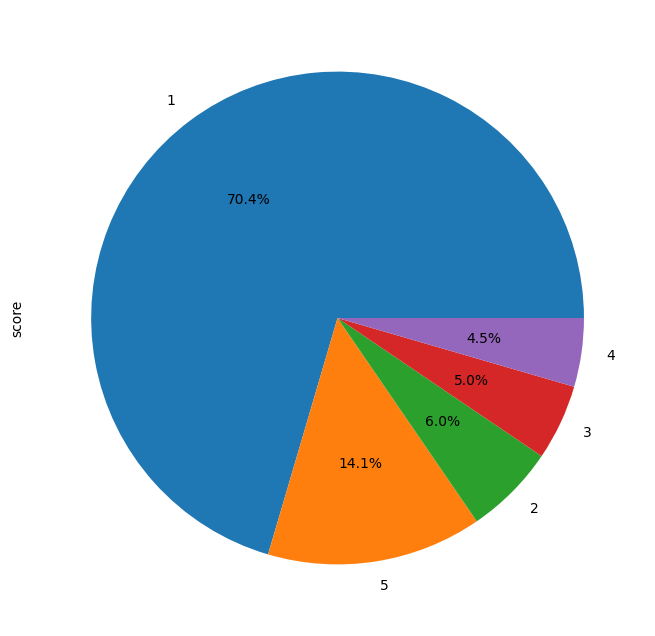

In [8]:
# Visualize review scores as pie chart  
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

In [9]:
# Create new dataframe with review content and score for further analysis
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [10]:
# Display new dataframe header
df_reviews_content.head()

,content,score
0,Issue with app. Seems like their technical sup...,1
1,"Its worst app, there is no option to give less...",1
2,The app does not show you the previous days to...,1
3,I am not able to add money in the investment a...,1
4,"Logs out everytime, very difficult to log in a...",1


Install azure text analytics API

In [11]:
pip install azure-ai-textanalytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.9/173.9 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.8 MB/s eta 0:00:00


In [12]:
# Import necessary libraries
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [13]:
# Define the service key and endpoint of Azure Text Analytics
key = "4f40f49470f34ce2b1758902d75c182c"
endpoint = "https://mycognitiveserviceresource12345.cognitiveservices.azure.com/"

In [14]:
# Configure Azure Text Analytics client library
ta_credential = AzureKeyCredential(key)
text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint, 
        credential=ta_credential)
client = text_analytics_client

reviews_content_sentiment = []

# Pass review content to Azure Text Analytics and collect sentiment result
for index, headers in df_reviews_content.iterrows():
    reviews_content = str(headers['content'])
    print("Review Content: {}".format(reviews_content))
    documents = [reviews_content]
    response = client.analyze_sentiment(documents=documents, language="zh-hant")[0]
    sentiment = response.sentiment
    print("Review Content Sentiment: {}".format(sentiment))
    reviews_score = str(headers['score'])
    print("Review Content Score: {}".format(reviews_score))
    reviews_content_sentiment.append([reviews_content, sentiment, reviews_score])

# Convert collected news headers with sentiment to Pandas dataframes.
reviews_content_sentiment = pd.DataFrame(reviews_content_sentiment, columns=['content','sentiment','reviews_score'])

Streaming output truncated to the last 5000 lines.
Review Content Sentiment: negative
Review Content Score: 1
Review Content: Once your number get registered it cannot be unregistered again it sticks permanently and my number is falsely registered by some people and I'm unable to do anything about it.
Review Content Sentiment: negative
Review Content Score: 1
Review Content: Wrost app. Didn't get the payment for some transaction even the transaction were not show in the app coustomer service is also wrost.
Review Content Sentiment: negative
Review Content Score: 1
Review Content: Bharatpe is a good app for merchants but you may add a option for adding profile photo for bharatpe account. This may help to recognise more easily.
Review Content Sentiment: positive
Review Content Score: 3
Review Content: Worst service ever.... I am using BharatPe merchant app. They provided swipe machine to my hotel and that machine not work for single day even...when I called to local person who installed 

In [15]:
# Count number of review content sentiment
reviews_content_sentiment['sentiment'].value_counts()

negative    3324
positive     901
mixed        772
neutral      177
Name: sentiment, dtype: int64

<Axes: ylabel='content'>

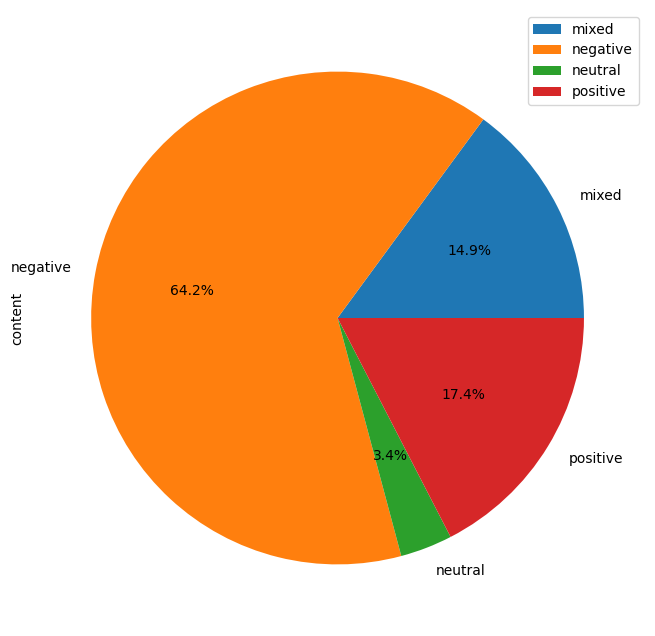

In [16]:
# Visualize review content sentiment as pie chart.
reviews_content_sentiment.groupby(['sentiment']).count().plot(kind='pie', y='content', figsize=(8,8), autopct='%1.1f%%')

In [17]:
# Group by sentiment & reviews_score
reviews_content_sentiment.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
mixed      1                 514
           2                  64
           3                  57
           4                  51
           5                  86
negative   1                2911
           2                 184
           3                 129
           4                  63
           5                  37
neutral    1                 114
           2                  27
           3                  19
           4                   8
           5                   9
positive   1                 106
           2                  34
           3                  52
           4                 111
           5                 598
Name: content, dtype: int64

<Axes: xlabel='sentiment'>

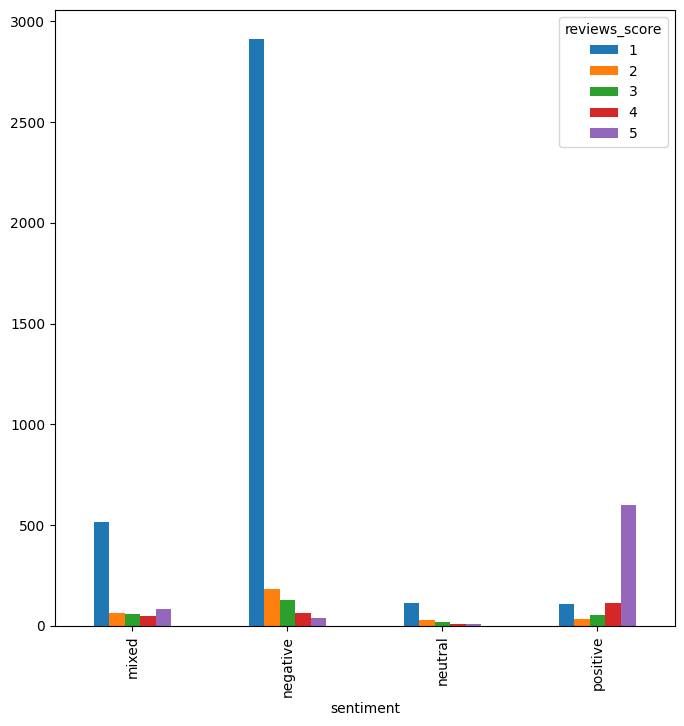

In [18]:
# Visual sentiment & reviews_score as bar chart
pd.crosstab(reviews_content_sentiment['sentiment'],reviews_content_sentiment['reviews_score']).plot.bar(figsize=(8,8))

In [19]:
# Check dataframe information
reviews_content_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        5174 non-null   object
 1   sentiment      5174 non-null   object
 2   reviews_score  5174 non-null   object
dtypes: object(3)
memory usage: 121.4+ KB


In [20]:
# Create new dataframe to perform factorization
reviews_content_sentiment_factorized = reviews_content_sentiment.copy()

In [21]:
# Perform factorization for sentiment column
reviews_content_sentiment_factorized.sentiment = pd.factorize(reviews_content_sentiment_factorized.sentiment)[0]

In [22]:
# Convert reviews_score column data type to intager
reviews_content_sentiment_factorized['reviews_score'] = reviews_content_sentiment_factorized['reviews_score'].astype(int)

In [23]:
# Check dataframe information
reviews_content_sentiment_factorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        5174 non-null   object
 1   sentiment      5174 non-null   int64 
 2   reviews_score  5174 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 121.4+ KB


In [24]:
# Group by sentiment (factorized) & reviews_score
reviews_content_sentiment_factorized.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
0          1                2911
           2                 184
           3                 129
           4                  63
           5                  37
1          1                 514
           2                  64
           3                  57
           4                  51
           5                  86
2          1                 114
           2                  27
           3                  19
           4                   8
           5                   9
3          1                 106
           2                  34
           3                  52
           4                 111
           5                 598
Name: content, dtype: int64